In [503]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [504]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [505]:
print(train_data.columns.values)
train_data.describe()
train_data.describe(include=['O'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Greenberg, Mr. Samuel",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Text(0.5, 1.0, 'combine')

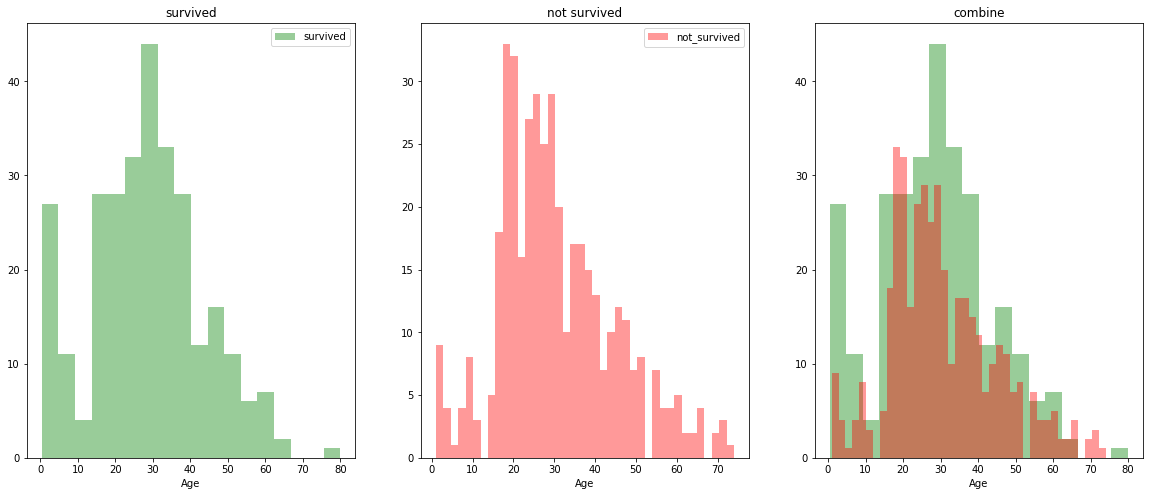

In [506]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax.legend()
ax.set_title('survived')
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('not survived')
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[2], kde =False, color="green")
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[2], kde = False, color="red")
ax.set_title('combine')

1. Young passengers had high survival rate, and old passengers had low survival rate.
2. Most passengers are in 15-35 age range, and many passengers in this range did not survive.

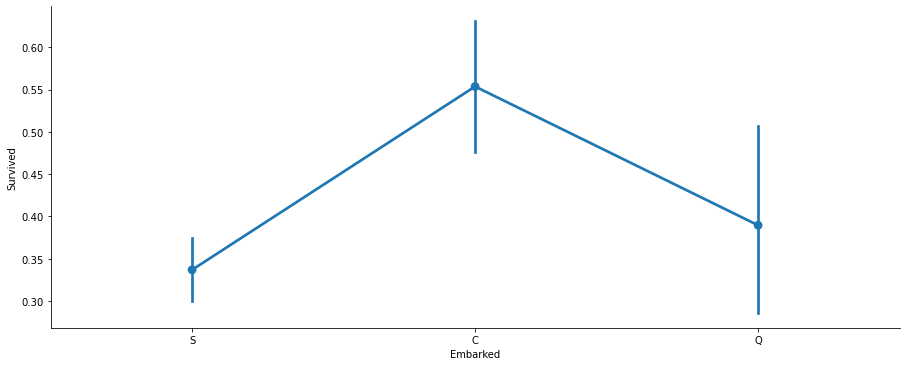

In [507]:
sns.factorplot('Embarked','Survived', data=train_data, aspect = 2.5)

Passengers from port ‘Southampton’ have a low survival rate of 34%, from the port ‘Cherbourg’ have a survival rate of 55%, from the port ‘Queenstown’ have a survival rate of 39%

In [508]:

train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

ticket number is random, so we drop this column

In [509]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Certain titles mostly survived or did not

In [510]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 



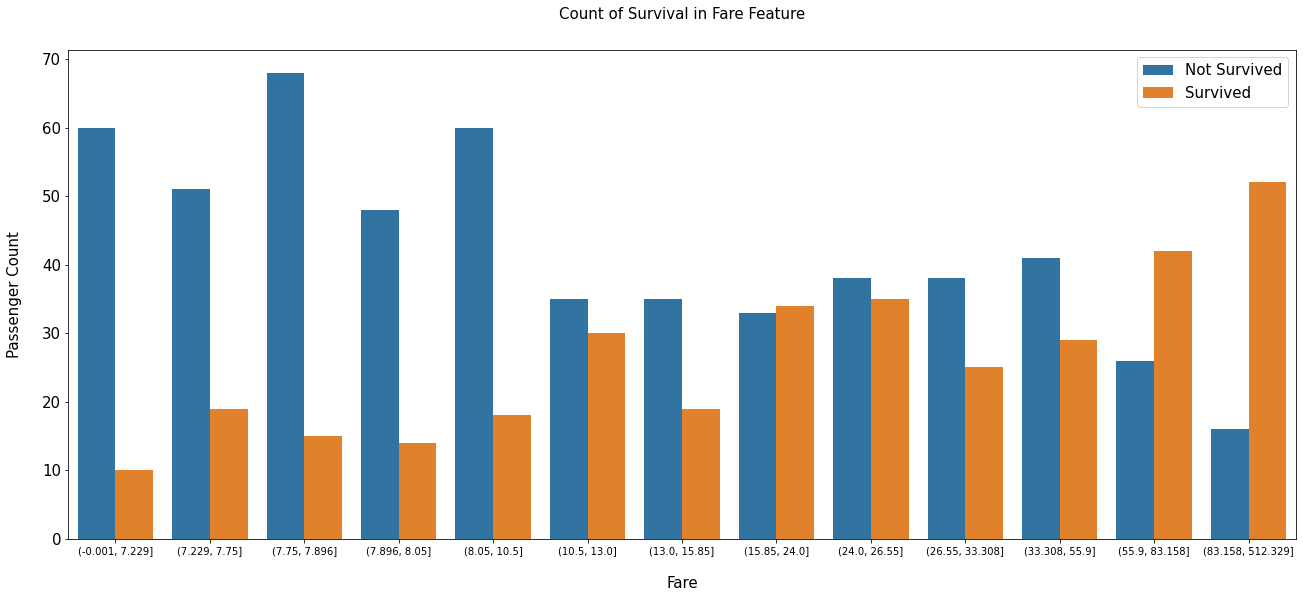

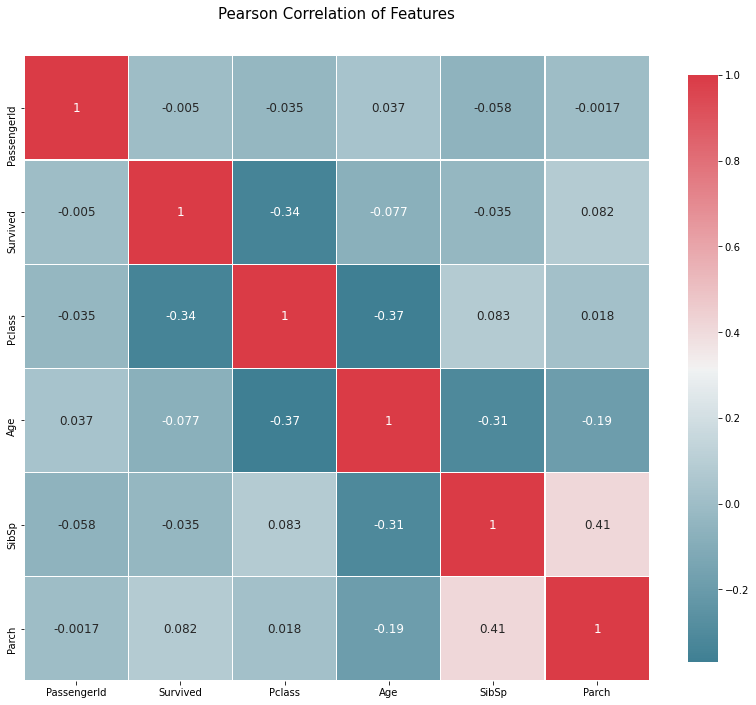

In [511]:
#print(train_data.info)
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())
#train_data.describe(include='all')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

data_raw = pd.read_csv('./data/train.csv')
data_val  = pd.read_csv('./data/test.csv')

data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

Target = ['Survived']
#pclass, sibsp, fare
data1_x = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
        
data1['Fare'] = pd.qcut(data1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()


#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

# Cabin

In [512]:
cabinisnull = train_data['Cabin'].isnull().sum()
cabinnotnull = train_data['Cabin'].count()
totalnum = train_data['PassengerId'].count()
print(cabinisnull/totalnum)
print(cabinnotnull/totalnum)
print(cabinisnull)
print(totalnum)

0.7710437710437711
0.22895622895622897
687
891


In [513]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

The Cabin data has too much null (687 out of 891 rows, about 77%) that it might not be good feature. However, it can help craft other features.  

In [514]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


We can drop name and passengerID

# Sex

In [515]:
train_data['isMale'] = 1
train_data['isMale'].loc[train_data['Sex']=='female'] = 0
train_data['isFemale'] = 1
train_data['isFemale'].loc[train_data['Sex']=='male'] = 0

In [516]:
male = train_data.loc[train_data.Sex == 'male']['Survived']
female = train_data.loc[train_data.Sex == 'female']['Survived']
malesurrate = sum(male)/len(male)
femalesurrate = sum(female)/len(female)
print(sum(male))
print(len(male))
print(malesurrate)
print(sum(female))
print(len(female))
print(femalesurrate)

109
577
0.18890814558058924
233
314
0.7420382165605095


Sex has high correlation (+-0.543) with survival in the training data set, which means gender may be a strong factor alone.  
Women have survival rate 0.7420382165605095, while men have much lower survival rate  0.18890814558058924  


| Gender\Number | Total | Survived | Survival Rate |
| ------------- | ----- | -------- | ------------- |
|     Women          |314|233|74.20%|
| Men         | 577  | 109     |18.89%|

# Parch

In [517]:
train_data.value_counts(['Parch'])
parchsur = list()
parchstat = list()
for i in range(0,7):
  parchsur.append(train_data.loc[train_data.Parch == i]['Survived'])
  parchstat.append((sum(parchsur[i]), len(parchsur[i])))

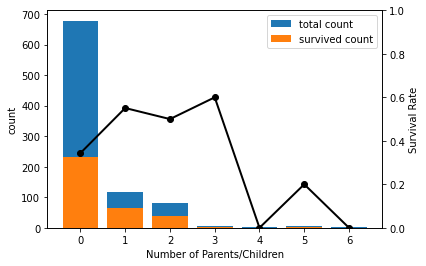

In [518]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6)
y = [x[0] for x in parchstat] 
y2 = [x[1] for x in parchstat] 
yy = [x[0]/x[1] for x in parchstat]
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

Parch describe number of one's parents/children, range from 0 to 6.  
The relation to the survival rate shown in the plot.  
detail:


| Parch         | 0     | 1     | 2     | 3     | 4    | 5     | 6    |
| ------------- | ----- | ----- | ----- | ----- | ---- | ----- | ---- |
| Total         | 678   | 118   | 80    | 5     | 4    | 5     | 1    |
| Survived      | 233   | 65    | 40    | 3     | 0    | 1     | 0    |
| Survival Rate | 34.3% | 55.0% | 50.0% | 60.0% | 0.0% | 20.0% | 0.0% |

# Family&Single  
Family is simply Parch+Sibsp, and isSingle is family=0.

In [519]:
train_data['Family']=0
train_data['Family']=train_data.Parch + train_data.SibSp
train_data['isSingle']=0
train_data['isSingle'].loc[train_data.Family==0] = 1
train_data.value_counts(['Family'])

Family
0         537
1         161
2         102
3          29
5          22
4          15
6          12
10          7
7           6
dtype: int64

In [520]:
train_data.value_counts(['Family'])
Fsur = list()
Fstat = list()
for i in range(0,11):
  Fsur.append(train_data.loc[train_data.Family == i]['Survived'])
  Fstat.append((sum(Fsur[i]), len(Fsur[i])))
print([x[1] for x in Fstat] )

[537, 161, 102, 29, 15, 22, 12, 6, 0, 0, 7]


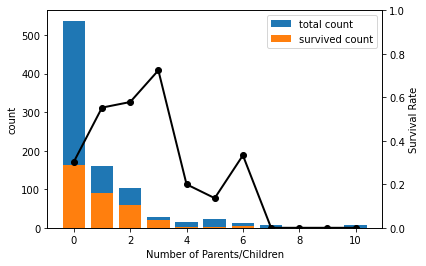

In [521]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6,7,8,9,10)
y = [x[0] for x in Fstat] 
y2 = [x[1] for x in Fstat] 
yy = list()
for ii in Fstat:
  if ii[0]!=0:
    yy.append(ii[0]/ii[1])
  else:
    yy.append(0)
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

In [522]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,isMale,isFemale,Family,isSingle
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.407753,-0.543351,0.543351,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.173929,0.131900,-0.131900,0.065997,0.135207
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.104766,0.093254,-0.093254,-0.301914,0.198270
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.269623,-0.114631,0.114631,0.890712,-0.584471
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.315784,-0.245489,0.245489,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.136310,-0.182333,0.182333,0.217138,-0.271832
Title,0.407753,-0.173929,-0.104766,0.269623,0.315784,0.136310,1.000000,-0.502713,0.502713,0.342039,-0.405813
isMale,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.502713,1.000000,-1.000000,-0.200988,0.303646
isFemale,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.502713,-1.000000,1.000000,0.200988,-0.303646
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,0.342039,-0.200988,0.200988,1.000000,-0.690922


In [523]:
singlesur =  train_data.loc[train_data.isSingle==1]['Survived']
nsinglesur = train_data.loc[train_data.isSingle==0]['Survived']
ssrate = sum(singlesur)/len(singlesur)
nsrate = sum(nsinglesur)/len(nsinglesur)
print(ssrate)
print(nsrate)

0.30353817504655495
0.5056497175141242


The correlation with survived is not higher using Family, but is higher using isSingle(-0.2).  
People had no other family member had lower survival rate (0.303), while others had higher (0.505).  

In [524]:
freq_port = train_data.Embarked.dropna().mode()[0]
combine = [train_data, test_data]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

<AxesSubplot:>

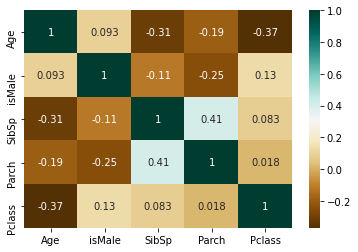

In [525]:
sns.heatmap(train_data[["Age","isMale","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

Age is negatively correlated with Pclass and SibSp.

In [526]:
guess_ages = np.zeros((9,3))
for dataset in combine:
    for i in range(0, 9):
        for j in range(0, 3):
            guess_df = dataset[(dataset['SibSp'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            if np.isnan(age_guess):
                continue
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5           
    for i in range(0, 9):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.SibSp == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine = [train_data, test_data]

In [527]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data = train_data.drop(['Sex'], axis=1)
test_data = test_data.drop(['Sex'], axis=1)
combine = [train_data, test_data]

In [528]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)  
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,isMale,isFemale,Family,isSingle
0,0,3,1,1,0,0,0,1,1,0,1,0
1,1,1,2,1,0,3,1,3,0,1,1,0
2,1,3,1,0,0,1,0,2,0,1,0,1
3,1,1,2,1,0,3,0,3,0,1,1,0
4,0,3,2,0,0,1,0,1,1,0,0,1
